In [7]:
import pandas as pd

resenha = pd.read_csv("saida.csv")
resenha.head()

,id,text_pt,sentiment
0,1,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Filmes de fotos de latão não é uma palavra apr...,neg


In [8]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state = 42)

In [9]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

ValueError: could not convert string to float: 'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

In [ ]:
print(resenha.sentiment.value_counts())

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [ ]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])
resenha["classificacao"] = classificacao


/tmp/ipykernel_6138/1076321768.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])


In [ ]:
resenha.head


<bound method NDFrame.head of           id                                            text_pt sentiment  \
0          1  Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1          2  Este é um exemplo do motivo pelo qual a maiori...       neg   
2          3  Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3          4  Nem mesmo os Beatles puderam escrever músicas ...       neg   
4          5  Filmes de fotos de latão não é uma palavra apr...       neg   
...      ...                                                ...       ...   
49454  49456  Como a média de votos era muito baixa, e o fat...       pos   
49455  49457  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  49458  Estou espantado com a forma como este filme e ...       pos   
49457  49459  A Christmas Together realmente veio antes do m...       pos   
49458  49460  O drama romântico da classe trabalhadora do di...       pos   

       classificacao  
0                  0  

In [ ]:
resenha

,id,text_pt,sentiment,classificacao
0,1,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...
49454,49456,"Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together realmente veio antes do m...,pos,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

vetorizar.get_feature_names_out()


array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [ ]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [10]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                      columns=vetorizar.get_feature_names_out())

In [11]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [12]:
vetorizar = CountVectorizer(lowercase=True, max_features=5)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)

matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                      columns=vetorizar.get_feature_names_out())

matriz_esparsa


,de,filme,não,que,um
0,4,1,4,7,3
1,7,4,3,10,5
2,10,3,6,8,3
3,13,4,5,7,7
4,16,1,2,4,3
...,...,...,...,...,...
49454,5,3,3,2,2
49455,1,0,0,2,1
49456,15,8,5,13,12
49457,5,0,2,6,4


In [ ]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=True, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [ ]:
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])

nuvem_palavras = WordCloud(width= 800, height= 500,
                           max_font_size=110, collocations = False).generate(todas_palavras)

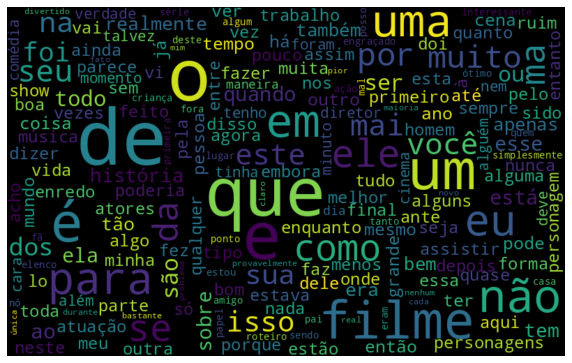

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()